<a href="https://colab.research.google.com/github/asadacce/ML-based-QSAR-against-GTPase-KRAS/blob/main/Md_pca_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
cd "/content/gdrive/My Drive/Colab Notebooks/MD_PCA"

/content/gdrive/My Drive/Colab Notebooks/MD_PCA


In [ ]:
! pip install mdtraj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mdtraj: filename=mdtraj-1.9.7-cp38-cp38-linux_x86_64.whl size=6108796 sha256=5e8f649fbc415ad2ceb8124aa2be941e4a446eb9160c31dd3e722a3c4c74e800
  Stored in directory: /root/.cache/pip/wheels/68/ff/96/5d9a2efac5e5918e5c8fd799e8703e2f8b804a029bcbbd2431
Successfully built mdtraj


In [ ]:
import mdtraj as md
from glob import glob
from sklearn.decomposition import PCA

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
top = md.load_topology('gtp.pdb')
traj = md.load(glob('gtp.trr'),
               atom_indices = top.select('backbone'), top=top)

In [ ]:
traj.superpose(traj, 0)

<mdtraj.Trajectory with 1003 frames, 679 atoms, 166 residues, and unitcells at 0x7f5474837f10>

In [ ]:
pca = PCA(2)
pca_transform = pca.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms*3)*10)
print (pca.explained_variance_ratio_)

[0.17940387 0.11136542]


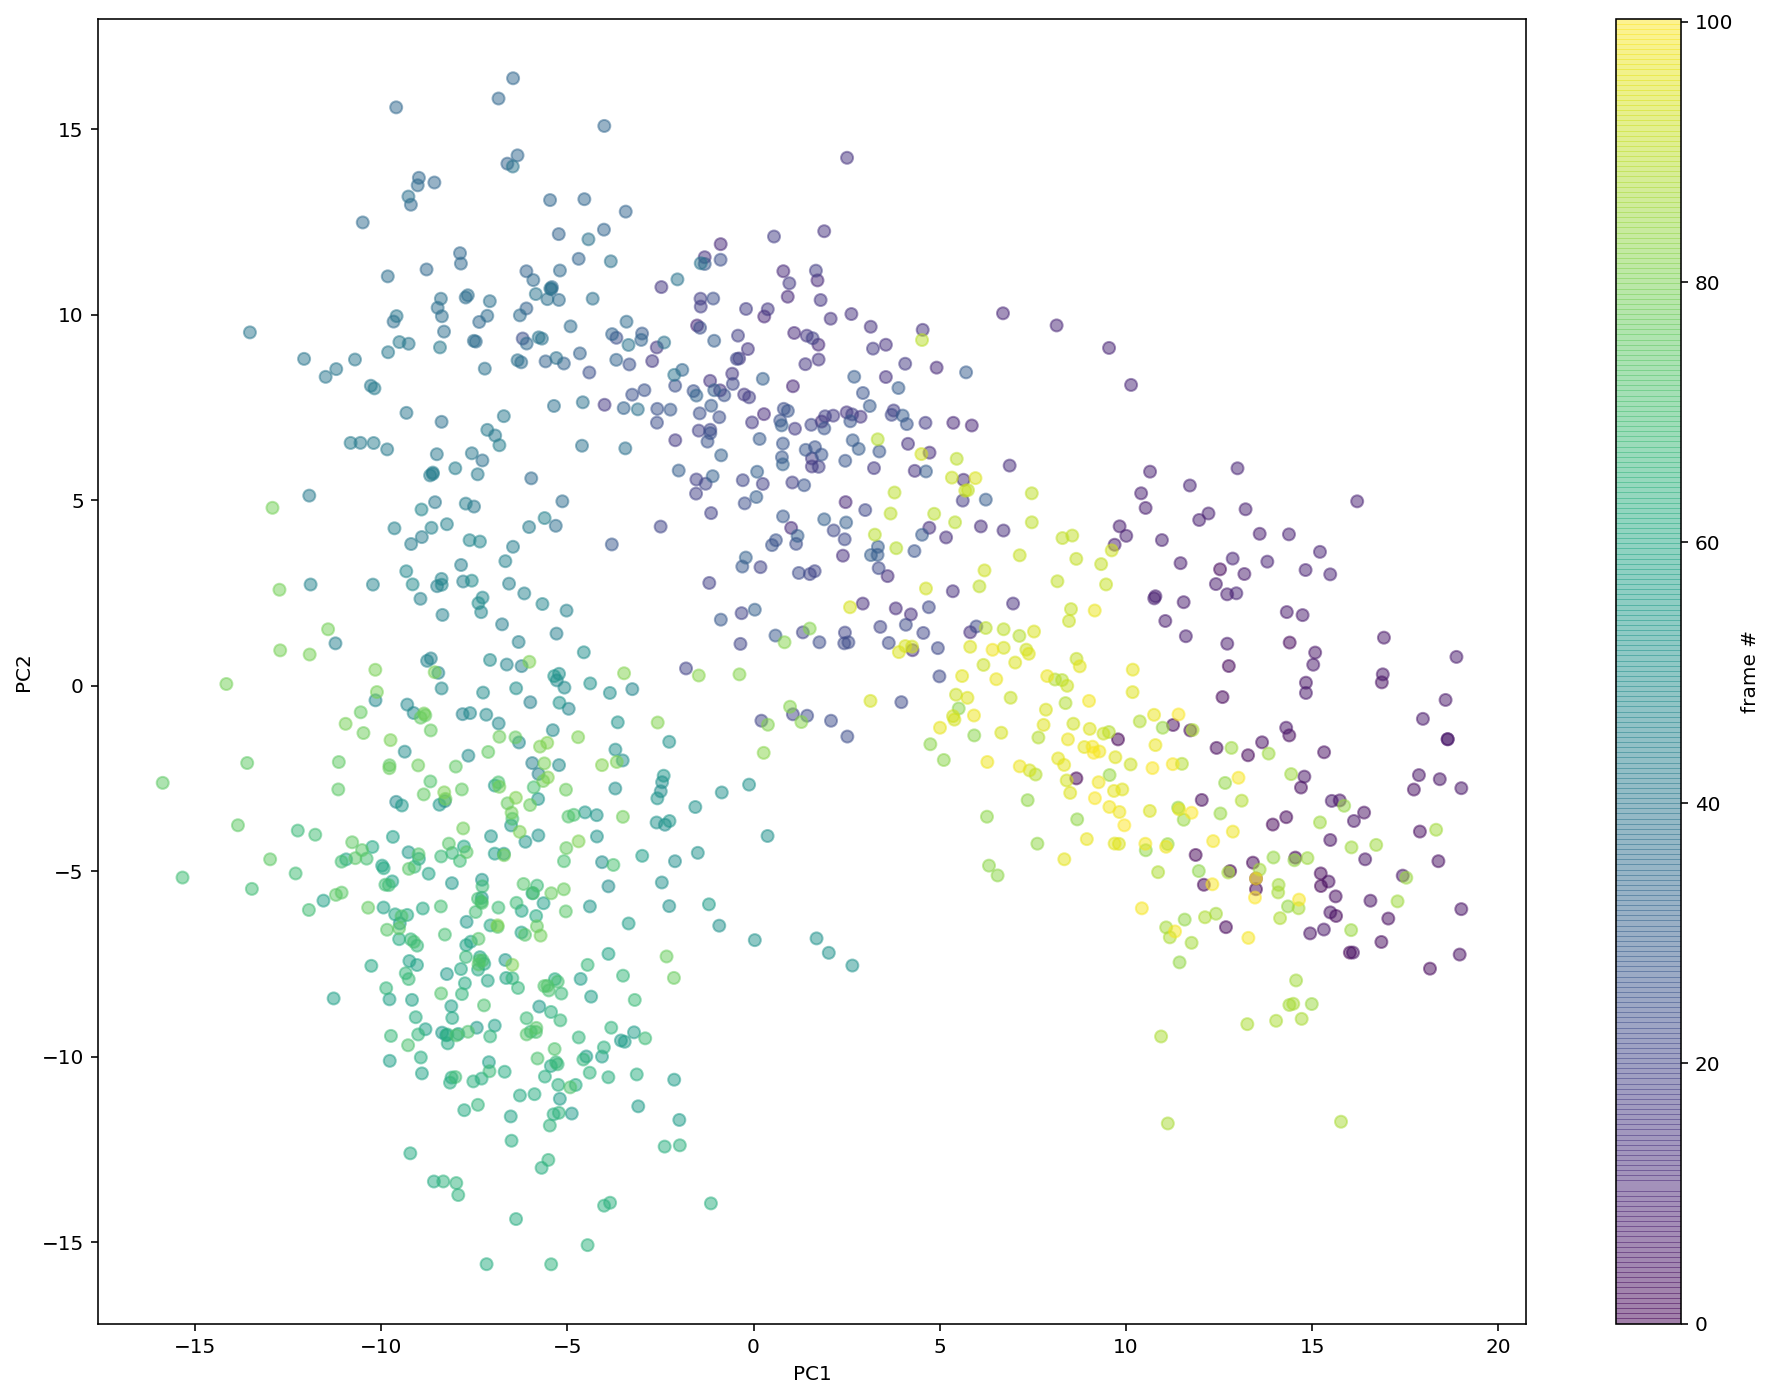

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # high resolution
import matplotlib

plt.figure(figsize=(16,12))
plt.scatter(pca_transform[:, 0], pca_transform[:,1], marker='o', c=traj.time, alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
cbar.set_label('frame #')

In [ ]:
pca = PCA(20)
pca_transform = pca.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms*3)*10)

In [ ]:
pca.components_.shape

(20, 2037)

Text(0.5, 1.0, 'Cumulative explained variance ration')

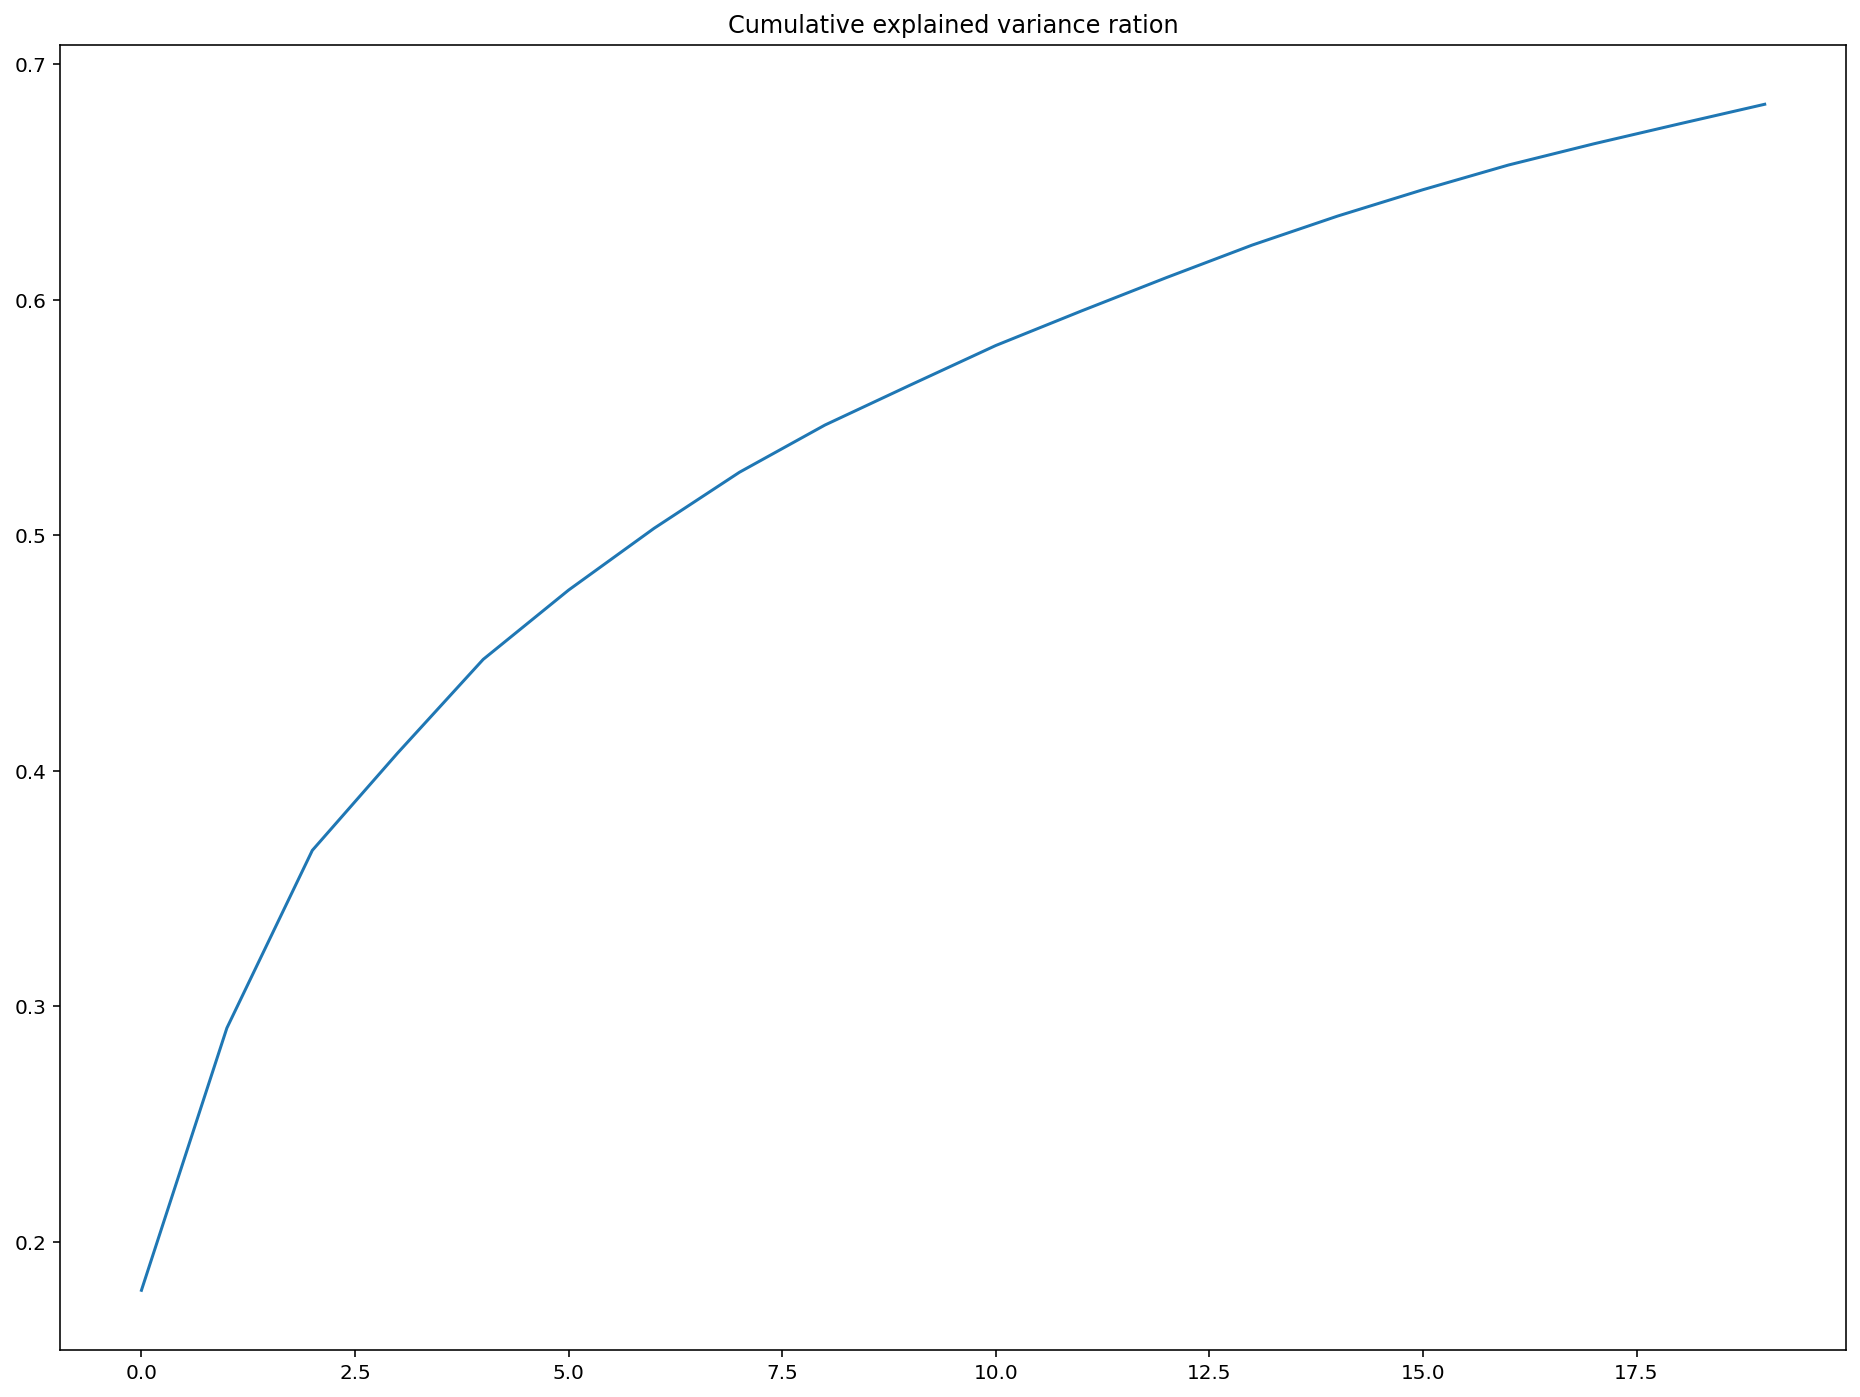

In [ ]:
import numpy as np

plt.figure(figsize=(16,12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative explained variance ration')

In [ ]:
pca2 = PCA(n_components=2)

from itertools import combinations
# this python function gives you all unique pairs of elements from a list

atom_pairs = list(combinations(range(traj.n_atoms), 2))
pairwise_distances = md.geometry.compute_distances(traj, atom_pairs)
print(pairwise_distances.shape)
reduced_distances = pca2.fit_transform(pairwise_distances)
print (pca2.explained_variance_ratio_)

(1003, 230181)
[0.1659867  0.09412596]


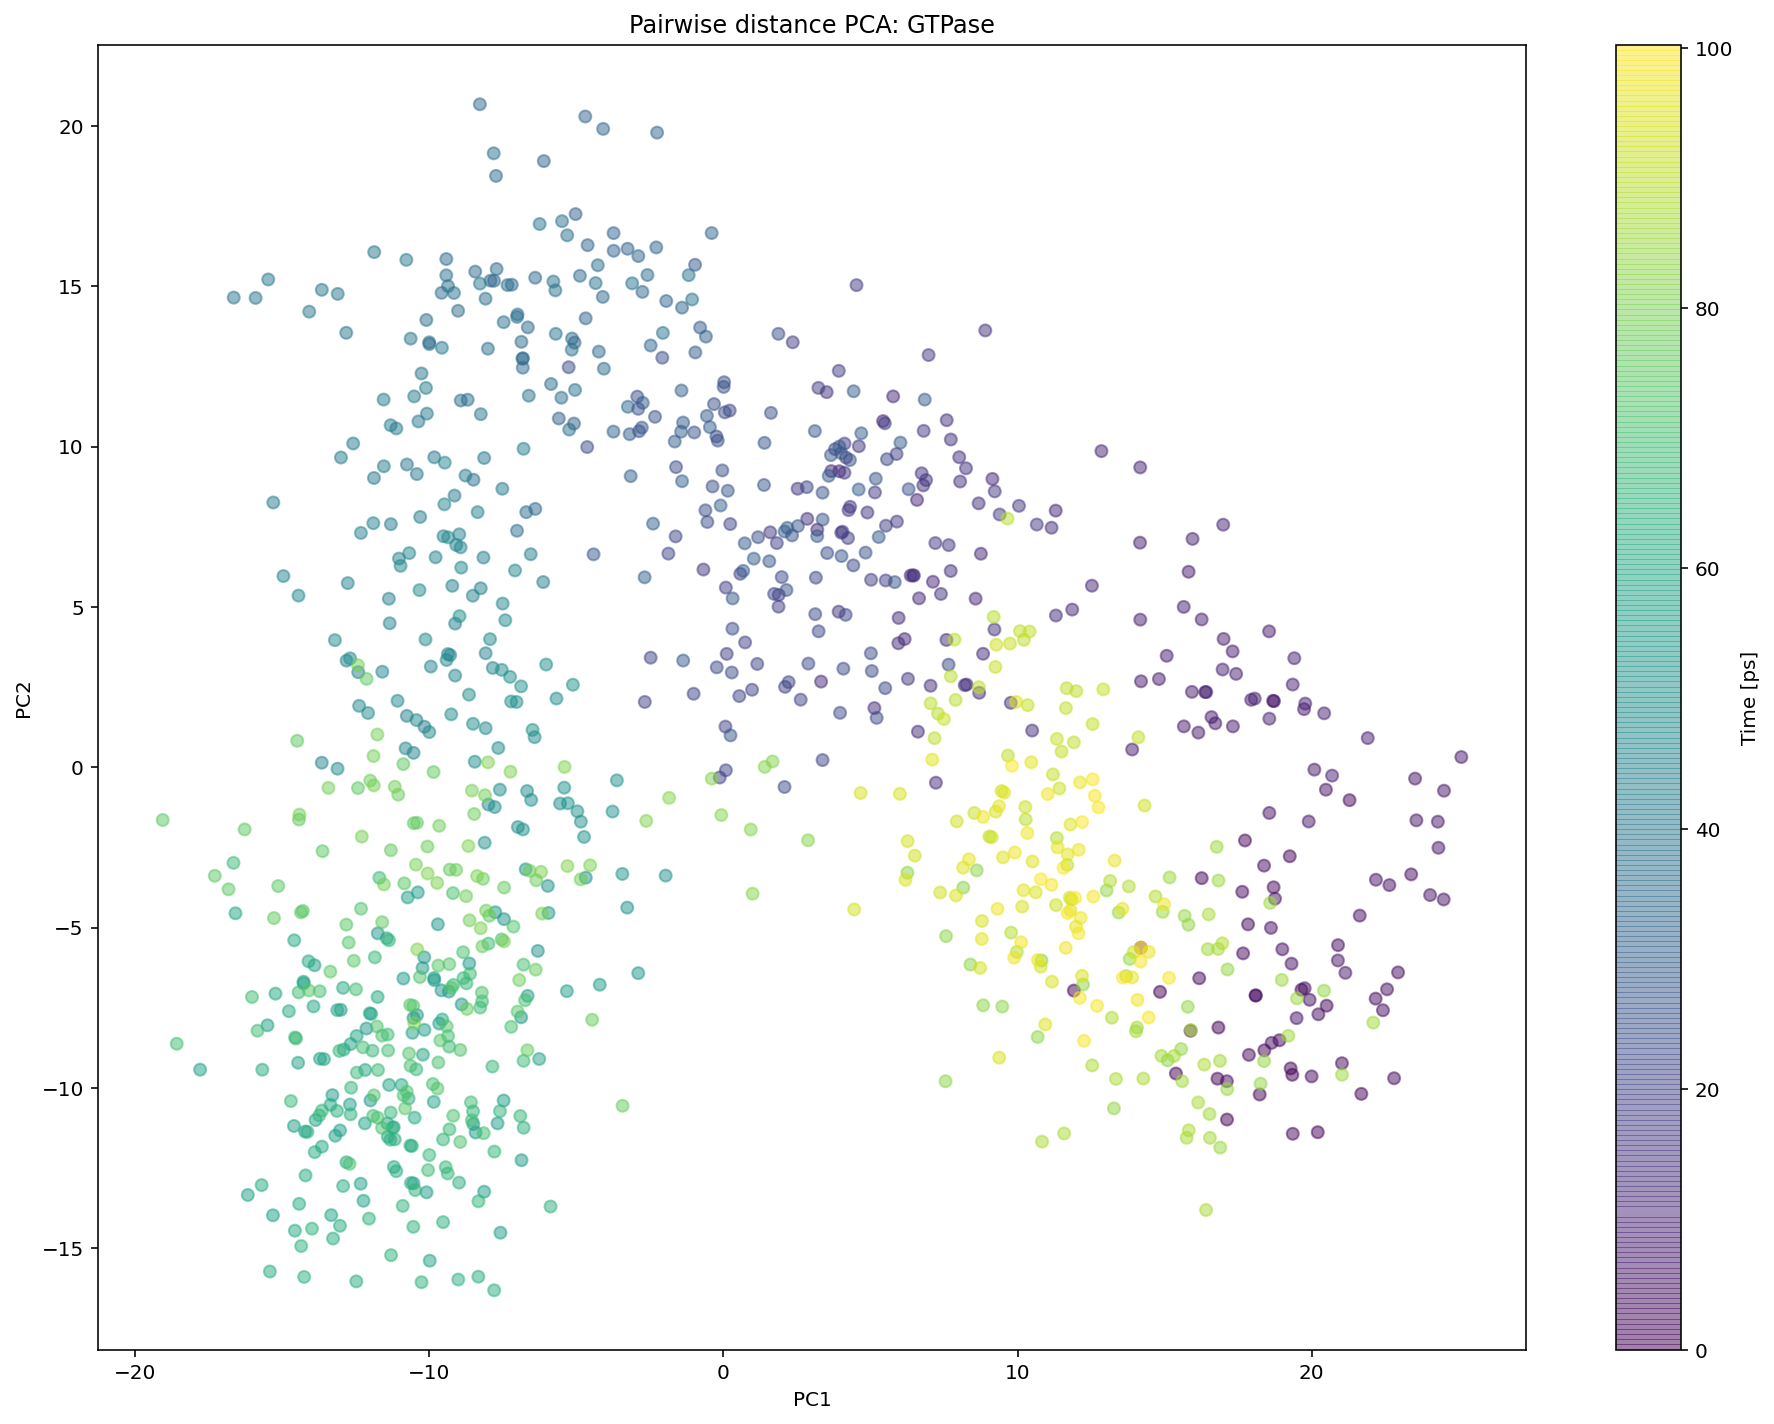

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # high resolution
import matplotlib

plt.figure(figsize=(16,12))
plt.scatter(reduced_distances[:, 0], reduced_distances[:,1], marker='o', c=traj.time, alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Pairwise distance PCA: GTPase')
cbar = plt.colorbar()
cbar.set_label('Time [ps]')